### Imports

In [6]:
import numpy as np
import scipy.stats
from block_pipeline import *
import matplotlib.pyplot as plt
import random 
random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}


jzazbz_array = np.load('../comp-syn2/notebooks/jzazbz_array.npy')

embedding_paths = {'JzAzBz_wavelet': 'block_stimuli_coeffs_jzazbz.txt',
                   'Grayscaled_wavelet': 'block_stimuli_coeffs_grey.txt',
                  'CNN': 'block_stimuli_resnet.json',
                  'Style': 'block_stimuli_style_vectors',
                  'Transformer': 'vt_emb_blocks.pickle'}

### Load data

In [2]:
block_data, block_data_stats = get_block_data(jzazbz_array)

minmax_dists = {}
img_names_in_order = {}

for key in embedding_paths.keys():
    minmax_dists[key], img_names_in_order[key] = get_block_embeddings(block_data,key,embedding_paths[key])

### Color Perception Statistics

In [14]:
print('Perceptually Uniform Wavelet vs. True Color Similarity')
print(scipy.stats.spearmanr(1.-block_data_stats['minmax_dists'][block_data_stats['minmax_dists']>0.],
                            minmax_dists['JzAzBz_wavelet'][block_data_stats['minmax_dists']>0.]))

print('\n')

print('Convolutional DNN vs. True Color Similarity')
print(scipy.stats.spearmanr(1.-block_data_stats['minmax_dists'][block_data_stats['minmax_dists']>0.],
                            minmax_dists['CNN'][block_data_stats['minmax_dists']>0.]))

print('\n')

print('Style Transfer DNN vs. True Color Similarity')
print(scipy.stats.spearmanr(1.-block_data_stats['minmax_dists'][block_data_stats['minmax_dists']>0.],
                            minmax_dists['Style'][block_data_stats['minmax_dists']>0.]))

print('\n')

print('Vision Transformer DNN vs. True Color Similarity')
print(scipy.stats.spearmanr(1.-block_data_stats['minmax_dists'][block_data_stats['minmax_dists']>0.],
                            minmax_dists['Transformer'][block_data_stats['minmax_dists']>0.]))

Perceptually Uniform Wavelet vs. True Color Similarity
SpearmanrResult(correlation=0.9577207678313979, pvalue=0.0)


Convolutional DNN vs. True Color Similarity
SpearmanrResult(correlation=0.5049901163687571, pvalue=0.0)


Style Transfer DNN vs. True Color Similarity
SpearmanrResult(correlation=0.7530748392613895, pvalue=0.0)


Vision Transformer DNN vs. True Color Similarity
SpearmanrResult(correlation=0.41992632194616075, pvalue=0.0)


### Plots 
#### Note: different random number generation yields a different sample of block images relative to the paper

In [31]:
rands = np.random.randint(len(minmax_dists['JzAzBz_wavelet'][block_data_stats['minmax_dists']>0.]),
                          size=1000)

inds_all = []

for i in range(10):
    inds = np.logical_and(0.1*i < minmax_dists['JzAzBz_wavelet'][block_data_stats['minmax_dists']>0.],
                          minmax_dists['JzAzBz_wavelet'][block_data_stats['minmax_dists']>0.] < 0.1+0.1*i)
    inds_all.extend(np.ravel(np.random.choice(np.arange(0,len(minmax_dists['JzAzBz_wavelet'][block_data_stats['minmax_dists']>0.]))[inds==True],
                                              100)))

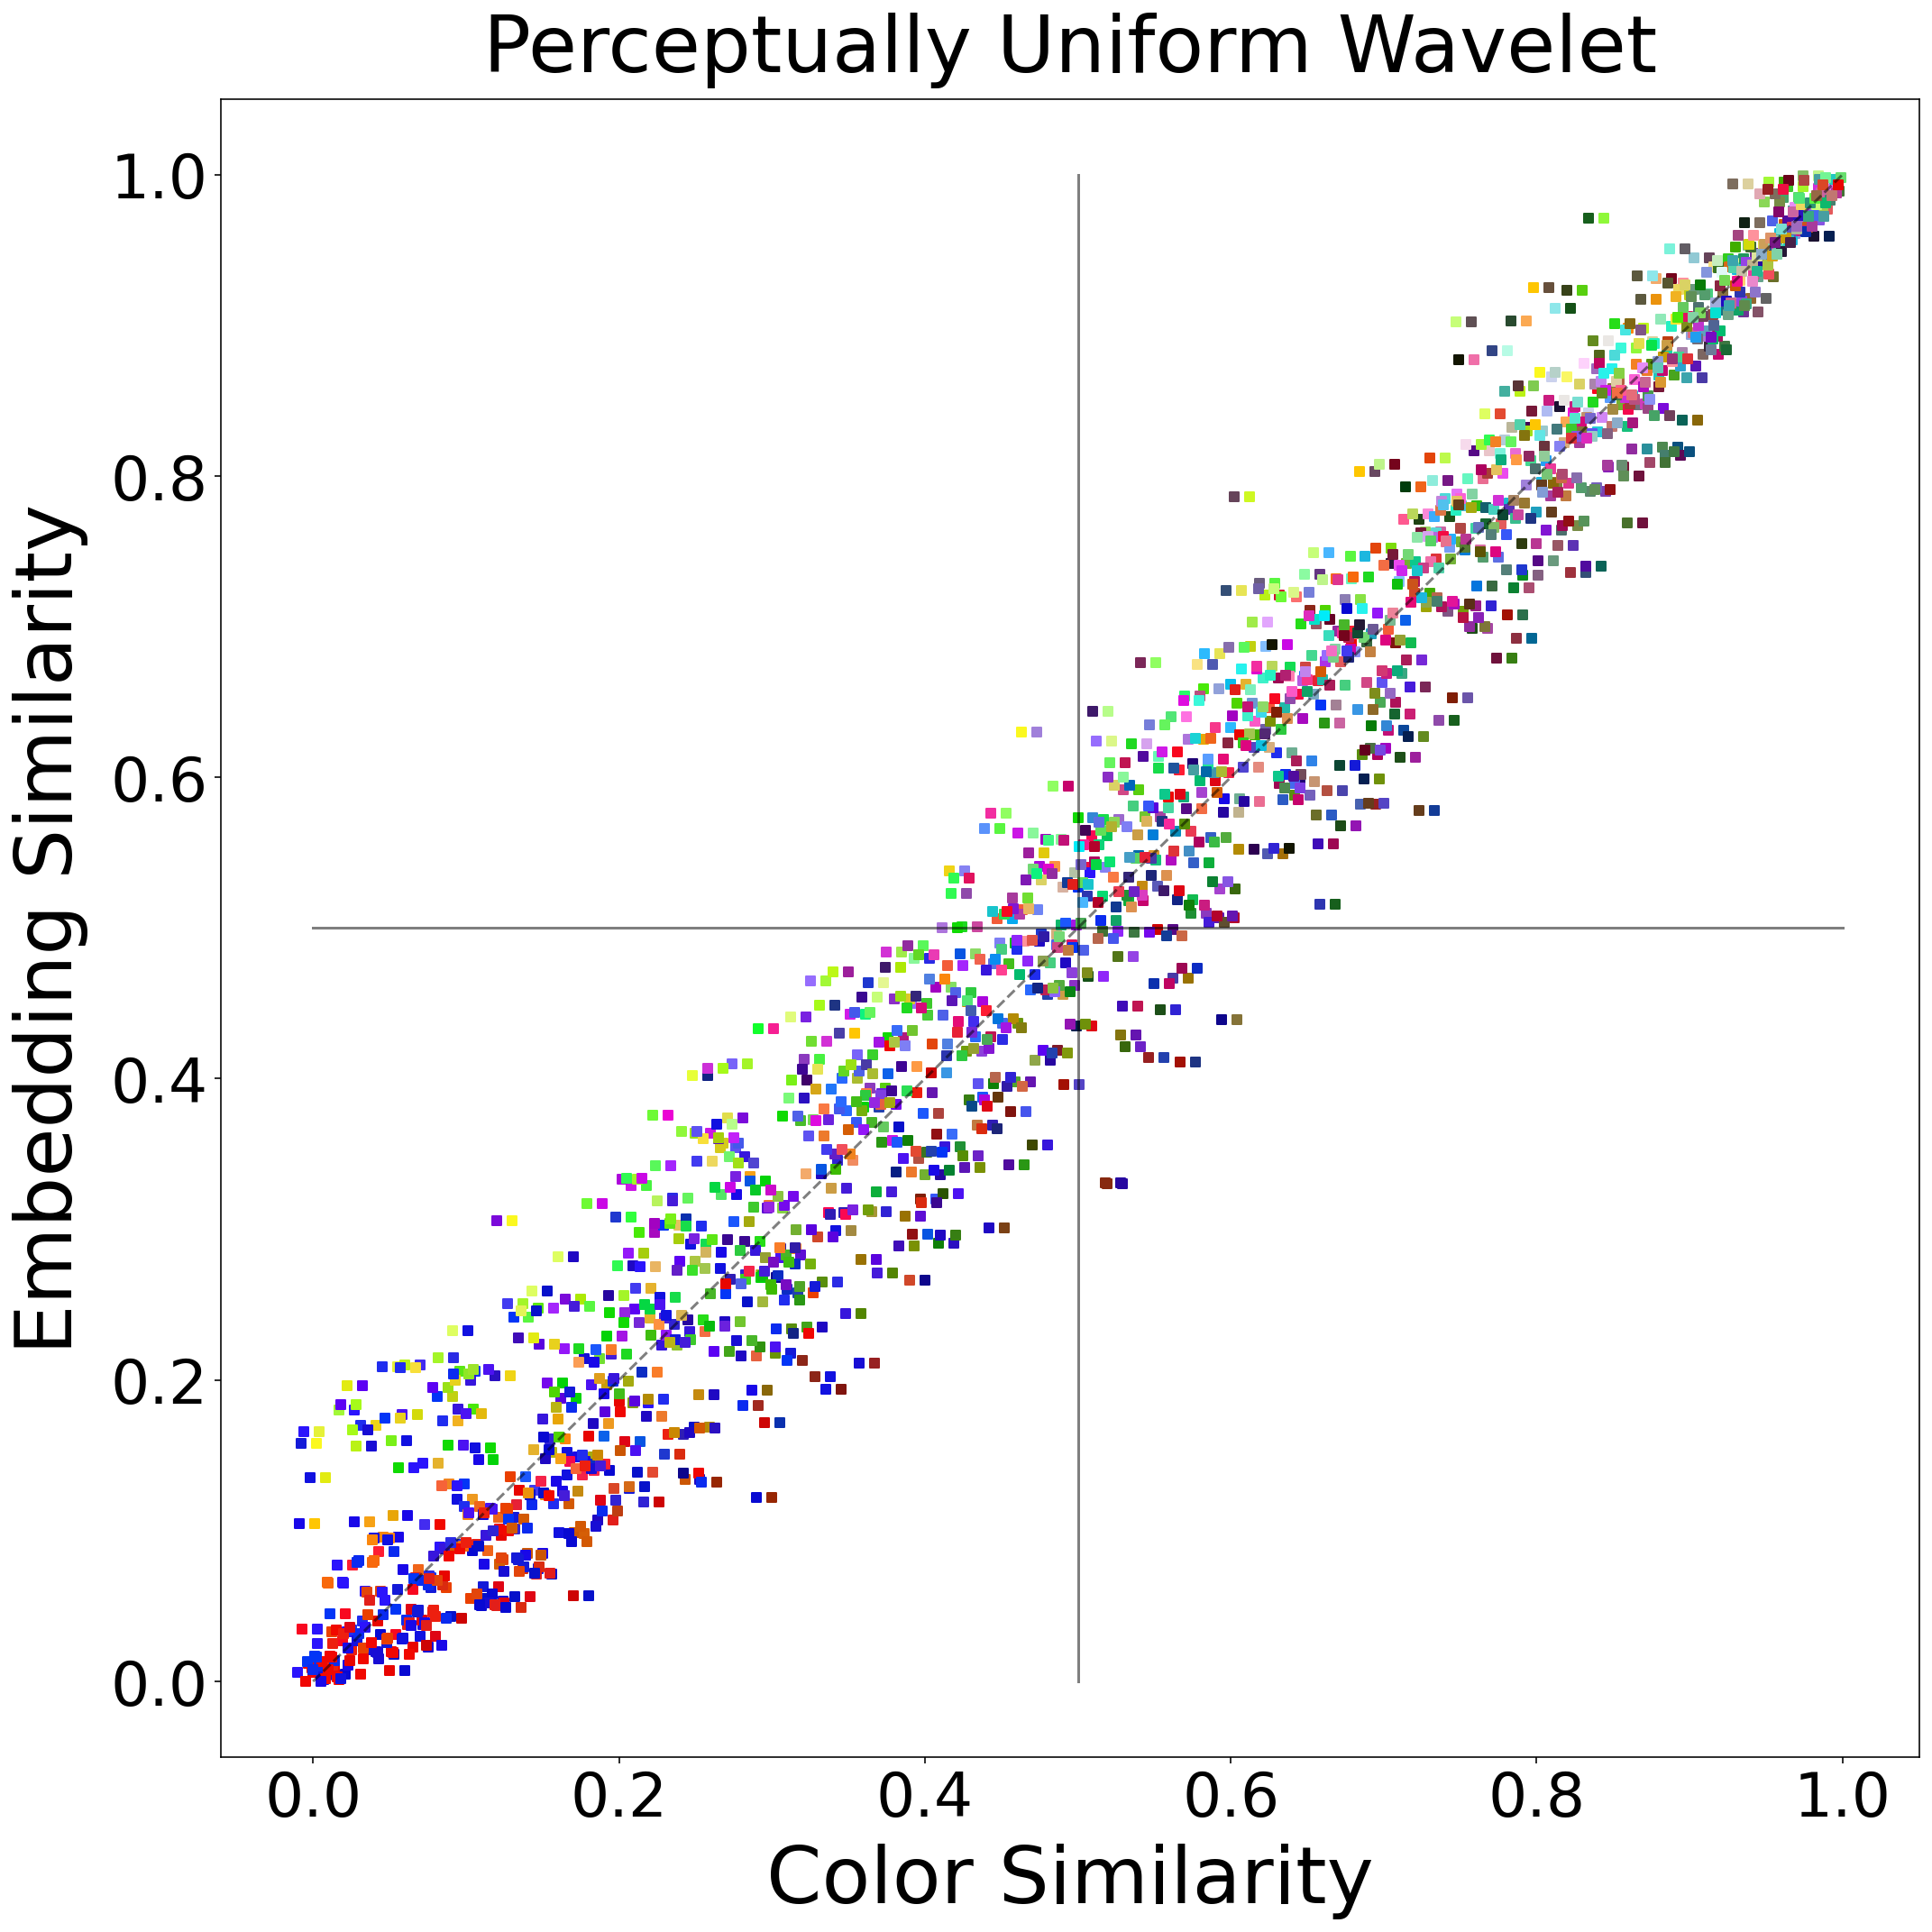

In [40]:
fig, ax = plt.subplots(figsize=(15,15))

length = len(1.-block_data_stats['minmax_dists'][block_data_stats['minmax_dists']>0.][inds_all])
minmax_dists_ordered = np.argsort(np.argsort(1.-block_data_stats['minmax_dists'][block_data_stats['minmax_dists']>0.][inds_all]))/(1.*length)
minmax_wavelet_dists_ordered = np.argsort(np.argsort(minmax_dists['JzAzBz_wavelet'][block_data_stats['minmax_dists']>0.][inds_all]))/(1.*length)

for i in range(len(inds_all)):
    try:
        ax.scatter(minmax_dists_ordered[i],minmax_wavelet_dists_ordered[i],marker='s',s=30,alpha=1.,
                  color=np.array(block_data_stats['colors1']).reshape(1000000,3)[block_data_stats['minmax_dists']>0.][inds_all][i]/255.)
        ax.scatter(-0.01+minmax_dists_ordered[i],minmax_wavelet_dists_ordered[i],marker='s',s=30,alpha=1.,
                  color=np.array(np.ravel(block_data_stats['colors2'])).reshape(1000000,3)[block_data_stats['minmax_dists']>0.][inds_all][i]/255.)
    except:
        continue
    
plt.plot(np.ones(10)*0.5,np.linspace(0.,1.,10),'k-',alpha=0.5)
plt.plot(np.linspace(0.,1.,10),np.ones(10)*0.5,'k-',alpha=0.5)
plt.plot(np.linspace(0.,1.,10),np.linspace(0.,1.,10),'k--',alpha=0.5)

plt.xticks([0.,0.2,0.4,0.6,0.8,1.0],fontsize=34)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0],fontsize=34)

plt.xlabel(r'Color Similarity',fontsize=44,labelpad=8)
plt.ylabel(r'Embedding Similarity',fontsize=44,labelpad=12)
plt.title(r'Perceptually Uniform Wavelet',fontsize=44,y=1.01)

plt.tight_layout()
plt.show()